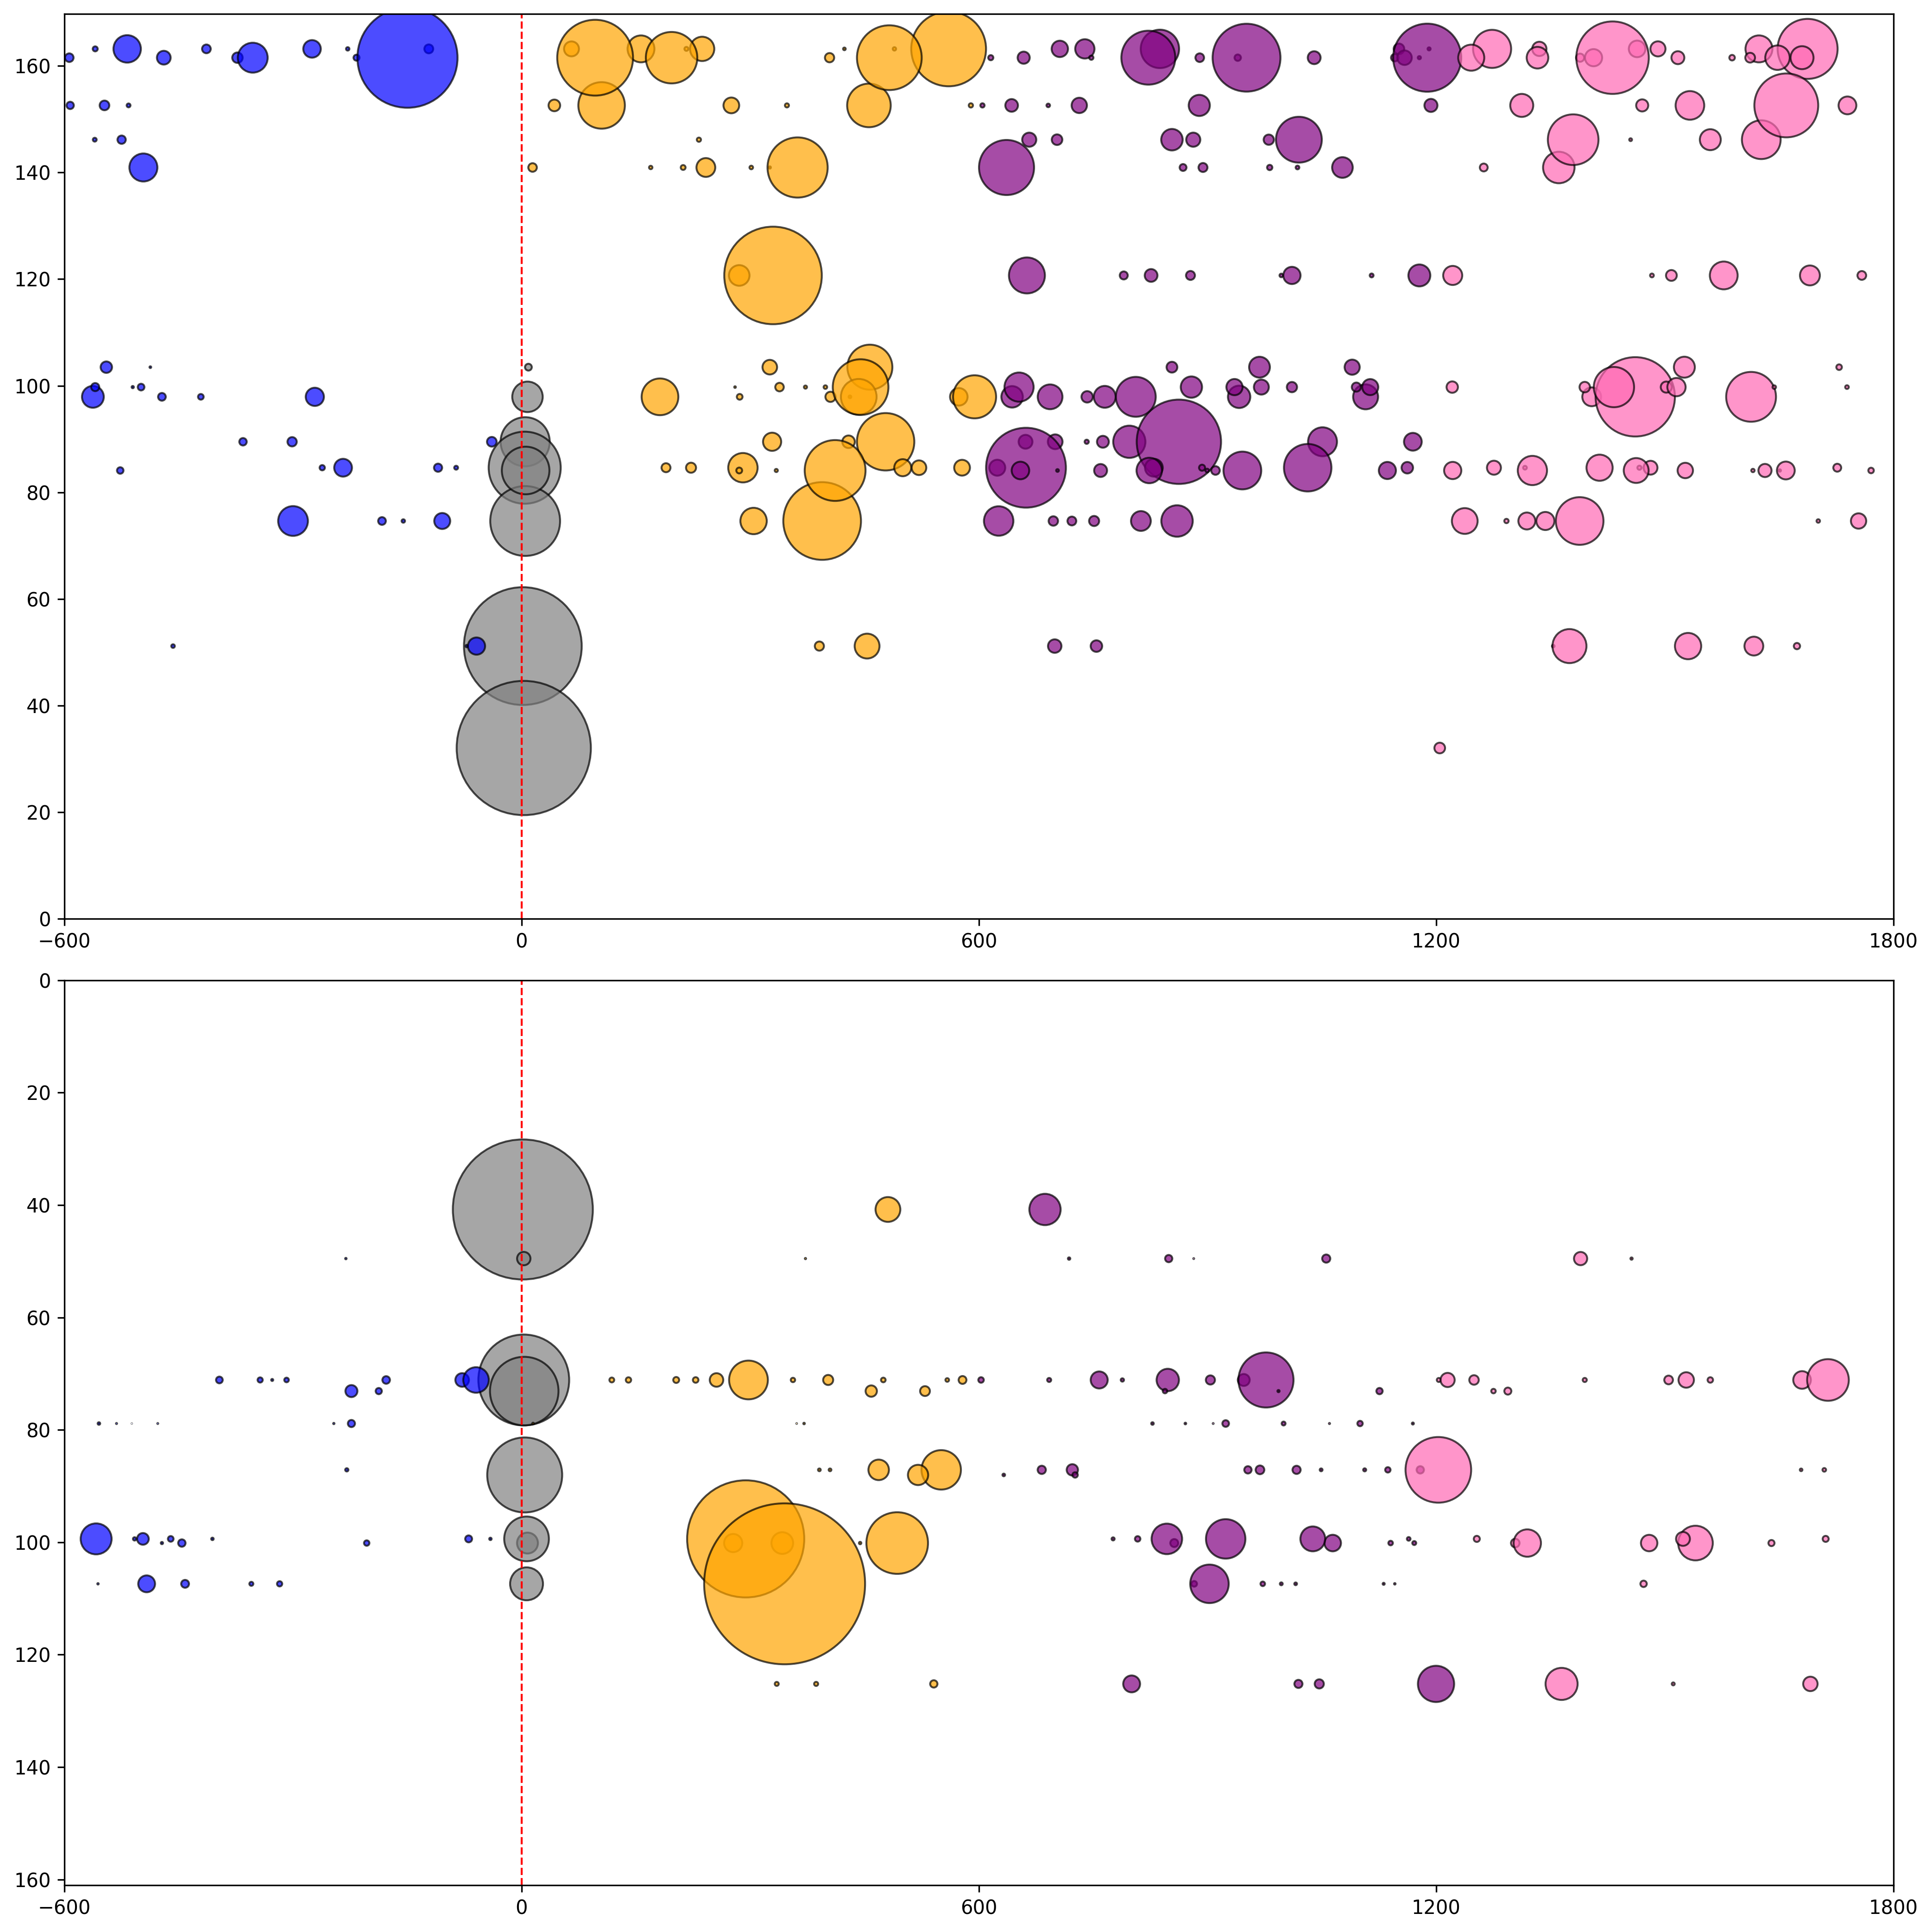

D:\PhD Manuscript\Figures\Soma Process Whole Cell\New Same ROI as old\Full Cell\1\pre_and_post_laser_combinedFinal1.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the raw data from the provided Excel file
file_path = r'D:\PhD Manuscript\Figures\Soma Process Whole Cell\New Same ROI as old\Full Cell\1\pre_post_laser_data_with_spatial_info_in_um.xlsx'
post_laser_df = pd.read_excel(file_path, sheet_name='Post_Laser')
pre_laser_df = pd.read_excel(file_path, sheet_name='Pre_Laser')

# Get the folder path of excel file
folder_path = os.path.dirname(file_path)

# Laser injury coordinates (in pixels)(check the laser co-ordinates and and image orientation/size carefully,and put accrodingly)
laser_x = 250
laser_y = 221 

# Convert to micrometers (0.497 um per pixel)
pixel_size = 0.497
laser_x_um = laser_x * pixel_size
laser_y_um = laser_y * pixel_size

# Calculate the distance of each event from the laser injury point
post_laser_df['Distance_from_Laser'] = np.sqrt((post_laser_df['Center_X_in_um'] - laser_x_um)**2 + 
                                                (post_laser_df['Center_Y_in_um'] - laser_y_um)**2)

pre_laser_df['Distance_from_Laser'] = np.sqrt((pre_laser_df['Center_X_in_um'] - laser_x_um)**2 + 
                                               (pre_laser_df['Center_Y_in_um'] - laser_y_um)**2)

# Adjust the x-axis to make 600 seconds/frame as 0 and increase accordingly for post-laser data( as we consider starting point as -10,and laser point as 0)
post_laser_df['Adjusted_Start_Time'] = post_laser_df['Start_Time'] - 600
# Adjust the x-axis to make -600 seconds/frame as 0 and increase accordingly for pre-laser data
pre_laser_df['Adjusted_Start_Time'] = pre_laser_df['Start_Time'] - 600

# Define a function to assign colors based on Adjusted_Start_Time
def assign_color(time):
    if time <= 0:
        return 'blue'
    elif 0 < time <= 10:
        return 'grey'
    elif 10 < time <= 600:
        return 'orange'
    elif 600 < time <= 1200:
        return 'purple'
    elif 1200 < time <= 1800:
        return '#FF69B4'
    else:
        return 'green'

# Apply the color for both pre-laser and post-laser data
post_laser_df['Bubble_Color'] = post_laser_df['Adjusted_Start_Time'].apply(assign_color)
pre_laser_df['Bubble_Color'] = pre_laser_df['Adjusted_Start_Time'].apply(assign_color)

# divided the data into 4 quadrants based on the center point (laser_x, laser_y) for both pre-laser and post-laser data
top_left_post_laser_df = post_laser_df[(post_laser_df['Center_X_in_um'] < laser_x_um) & (post_laser_df['Center_Y_in_um'] > laser_y_um)]
top_right_post_laser_df = post_laser_df[(post_laser_df['Center_X_in_um'] >= laser_x_um) & (post_laser_df['Center_Y_in_um'] > laser_y_um)]
bottom_left_post_laser_df = post_laser_df[(post_laser_df['Center_X_in_um'] < laser_x_um) & (post_laser_df['Center_Y_in_um'] <= laser_y_um)]
bottom_right_post_laser_df = post_laser_df[(post_laser_df['Center_X_in_um'] >= laser_x_um) & (post_laser_df['Center_Y_in_um'] <= laser_y_um)]

top_left_pre_laser_df = pre_laser_df[(pre_laser_df['Center_X_in_um'] < laser_x_um) & (pre_laser_df['Center_Y_in_um'] > laser_y_um)]
top_right_pre_laser_df = pre_laser_df[(pre_laser_df['Center_X_in_um'] >= laser_x_um) & (pre_laser_df['Center_Y_in_um'] > laser_y_um)]
bottom_left_pre_laser_df = pre_laser_df[(pre_laser_df['Center_X_in_um'] < laser_x_um) & (pre_laser_df['Center_Y_in_um'] <= laser_y_um)]
bottom_right_pre_laser_df = pre_laser_df[(pre_laser_df['Center_X_in_um'] >= laser_x_um) & (pre_laser_df['Center_Y_in_um'] <= laser_y_um)]

# Create the figure for both top-left and top-right combined, and bottom-left and bottom-right combined( 4 qudarant from laser injury point)
fig, axs = plt.subplots(2, 1, figsize=(14, 14), dpi=300)  # 2 rows, 1 column for the combined figure

# Add a dotted red line at x = 0 for both subplots
for ax in axs:
    ax.axvline(x=0, color='red', linestyle='--', linewidth=1)

# Combine top-left and top-right quadrants into the first plot for post-laser
for i, row in top_left_post_laser_df.iterrows():
    auc_marker_size = row['AUC'] * 27  # Scale AUC for dot size
    axs[0].scatter(row['Adjusted_Start_Time'], row['Distance_from_Laser'], s=auc_marker_size, alpha=0.7, color=row['Bubble_Color'], marker='o', edgecolors='k', linewidths=1)

for i, row in top_right_post_laser_df.iterrows():
    auc_marker_size = row['AUC'] * 27  # Scale AUC for dot size
    axs[0].scatter(row['Adjusted_Start_Time'], row['Distance_from_Laser'], s=auc_marker_size, alpha=0.7, color=row['Bubble_Color'], marker='o', edgecolors='k', linewidths=1)

# Combine bottom-left and bottom-right quadrants into the second plot for post-laser
for i, row in bottom_left_post_laser_df.iterrows():
    auc_marker_size = row['AUC'] * 27
    axs[1].scatter(row['Adjusted_Start_Time'], row['Distance_from_Laser'], s=auc_marker_size, alpha=0.7, color=row['Bubble_Color'], marker='o', edgecolors='k', linewidths=1)

for i, row in bottom_right_post_laser_df.iterrows():
    auc_marker_size = row['AUC'] * 27
    axs[1].scatter(row['Adjusted_Start_Time'], row['Distance_from_Laser'], s=auc_marker_size, alpha=0.7, color=row['Bubble_Color'], marker='o', edgecolors='k', linewidths=1)

# Combine top-left and top-right quadrants into the first plot for pre-laser
for i, row in top_left_pre_laser_df.iterrows():
    auc_marker_size = row['AUC'] * 27 # Scale AUC for dot size
    axs[0].scatter(row['Adjusted_Start_Time'], row['Distance_from_Laser'], s=auc_marker_size, alpha=0.7, color=row['Bubble_Color'], marker='o', edgecolors='k', linewidths=1)

for i, row in top_right_pre_laser_df.iterrows():
    auc_marker_size = row['AUC'] * 27  # Scale AUC for dot size
    axs[0].scatter(row['Adjusted_Start_Time'], row['Distance_from_Laser'], s=auc_marker_size, alpha=0.7, color=row['Bubble_Color'], marker='o', edgecolors='k', linewidths=1)

# Combine bottom-left and bottom-right quadrants into the second plot for pre-laser
for i, row in bottom_left_pre_laser_df.iterrows():
    auc_marker_size = row['AUC'] * 27
    axs[1].scatter(row['Adjusted_Start_Time'], row['Distance_from_Laser'], s=auc_marker_size, alpha=0.7, color=row['Bubble_Color'], marker='o', edgecolors='k', linewidths=1)

for i, row in bottom_right_pre_laser_df.iterrows():
    auc_marker_size = row['AUC'] * 27
    axs[1].scatter(row['Adjusted_Start_Time'], row['Distance_from_Laser'], s=auc_marker_size, alpha=0.7, color=row['Bubble_Color'], marker='o', edgecolors='k', linewidths=1)

# y-axis limits for bottom-right and invert it (170 to 0)
axs[1].set_ylim(161, 0)

# y-axis ticks at every 20 um for all subplots
for ax in axs:
    ax.set_yticks(np.arange(0, 161, 20))

# custom x-axis ticks lim
for ax in axs:
    ax.set_xticks(np.arange(-600, 1801, 600))  # Set x-axis ticks at -600, 0, 600, 1200, and 1800

# axis limits for time (0 to 2400)
for ax in axs:
    ax.set_xlim(-600, 1800)
    ax.grid(False)  # Remove grid

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Save the figure without legends or gaps
figure_path = os.path.join(folder_path, 'pre_and_post_laser_combinedFinal1.png')
plt.savefig(figure_path, dpi=600, bbox_inches='tight', pad_inches=0)  # Save the combined figure to the folder without gaps

# Show the combined figure( for qudrant)
plt.show()
print(figure_path)
